In [1]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 4.9MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd "/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car


In [4]:
ls

data/  LICENSE  README.md


In [5]:
ls data/car.h5

data/car.h5


In [6]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [7]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

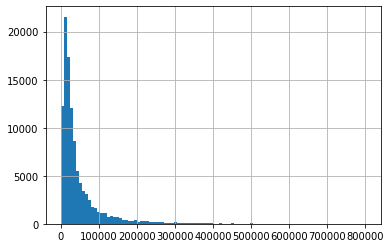

In [8]:
df['price_value'].hist(bins=100)

In [9]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [10]:
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

In [11]:
df.groupby('param_marka-pojazdu')['price_value'].mean()

param_marka-pojazdu
Acura         32349.250000
Aixam         26129.208955
Alfa Romeo    52053.311086
Aro           20800.000000
Asia          12500.000000
                  ...     
Yugo          47500.000000
Zaporożec      3900.000000
Zastava        2999.000000
Škoda         40068.437434
Żuk            4722.500000
Name: price_value, Length: 100, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe08715ac8>,
      dtype=object)

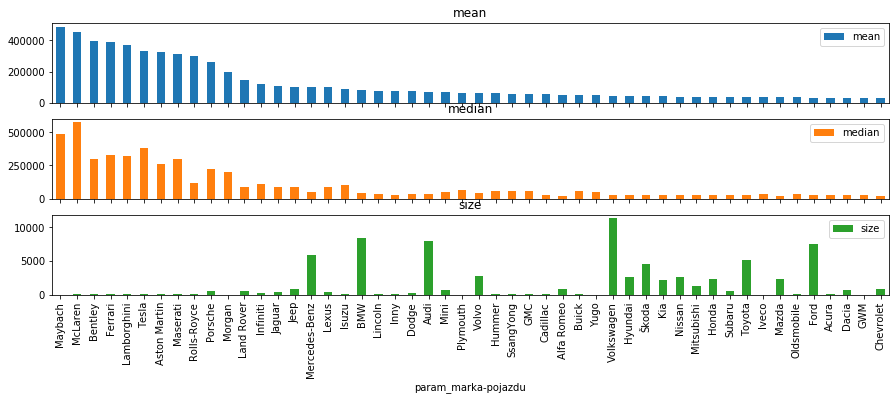

In [20]:
(
  df
  .groupby('param_marka-pojazdu')['price_value']
  .agg([np.mean, np.median, np.size])
  .sort_values(by='mean', ascending=False)
  .head(50)
).plot(kind='bar', figsize=(15,5), subplots=True)

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return (
    df
    .groupby(feat_groupby)[feat_agg]
    .agg(agg_funcs)
    .sort_values(by=feat_sort, ascending=False)
    .head(top)
  ).plot(kind='bar', figsize=(15,5), subplots=subplots)

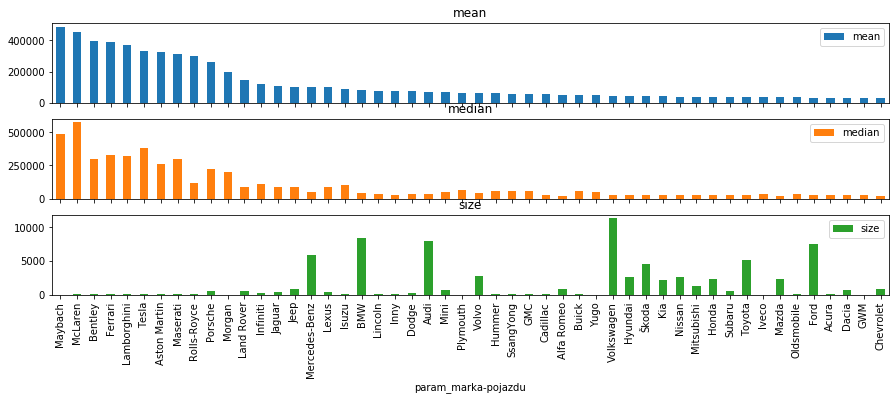

In [27]:
group_and_barplot('param_marka-pojazdu');

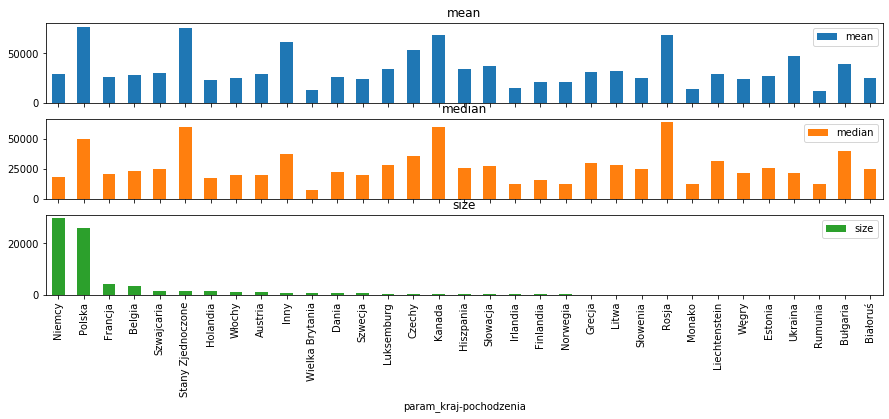

In [30]:
group_and_barplot('param_kraj-pochodzenia', feat_sort = 'size');

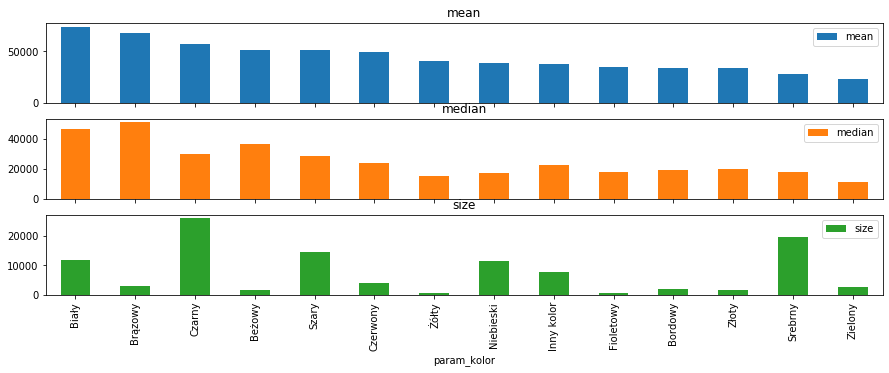

In [32]:
group_and_barplot('param_kolor', feat_sort = 'mean');

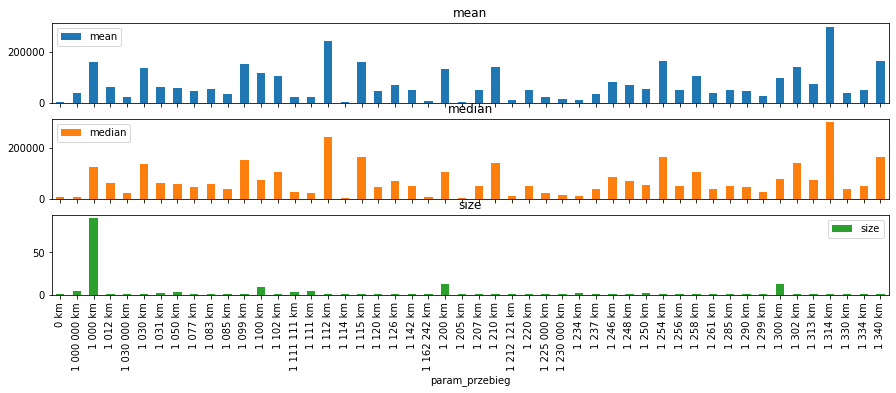

In [36]:
group_and_barplot('param_przebieg');

In [0]:
#show all columns and rows
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [48]:
df[['param_mileage','param_przebieg']].sample(10)

,param_mileage,param_przebieg
157533,None,161 541 km
112039,None,17 200 km
96917,None,174 000 km
55795,None,46 817 km
14057,None,186 778 km
82819,None,263 000 km
141715,None,230 000 km
43657,None,160 000 km
115658,None,255 000 km
116093,None,177 000 km


In [0]:
df['param_przebieg_int'] = df['param_przebieg'].str.replace(r'\D', '').replace([None],0).astype(int)

In [96]:
df[['param_przebieg','param_przebieg_int']].head(10)

,param_przebieg,param_przebieg_int
0,1 km,1
2,209 533 km,209533
3,30 500 km,30500
4,129 500 km,129500
5,29 100 km,29100
6,156 000 km,156000
7,5 km,5
10,104 999 km,104999
11,160 000 km,160000
13,216 000 km,216000


In [97]:
df[['param_przebieg','param_przebieg_int']].sort_values(by=['param_przebieg_int']).tail()

,param_przebieg,param_przebieg_int
32080,5 000 000 km,5000000
52252,5 000 000 km,5000000
1879,9 999 999 km,9999999
102835,9 999 999 km,9999999
10686,14 600 690 km,14600690


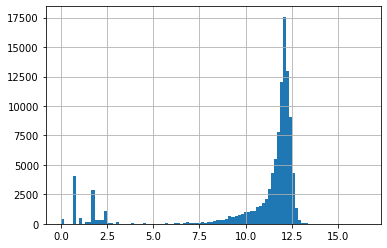

In [98]:
np.log(df['param_przebieg_int']+1).hist(bins=100)

In [99]:
df['param_przebieg_int'].describe()

count    1.064940e+05
mean     1.440999e+05
std      1.312748e+05
min      0.000000e+00
25%      6.700000e+04
50%      1.540000e+05
75%      2.050000e+05
max      1.460069e+07
Name: param_przebieg_int, dtype: float64

In [0]:
df['param_przebieg_kat'] = df['param_przebieg_int'].apply(lambda x: 'do 10 km' if x < 10 else ('10 - 100 000 km' if x < 100000 else ('100 000 - 200 000 km' if x < 200000 else 'powyzej 200 000 km')))

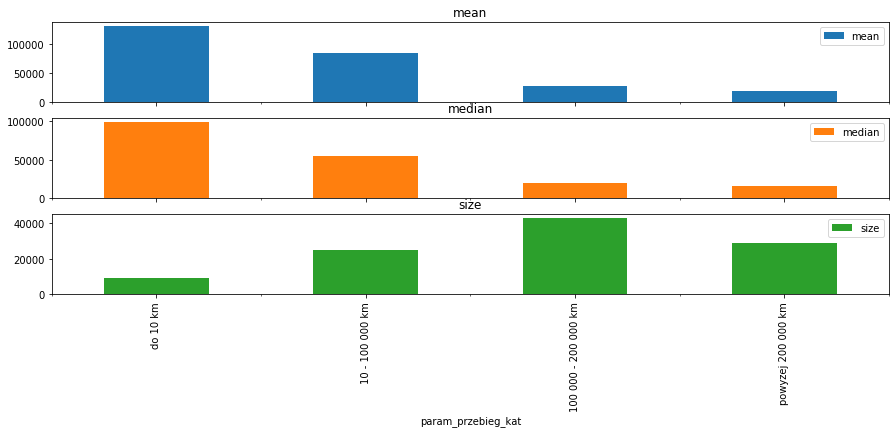

In [113]:
group_and_barplot('param_przebieg_kat', feat_sort = 'mean');